In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir, curdir, mkdir
import healpy as hp

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
twomass_dir = join(root_data_dir, "TWOMASS-15.8")
gaia_dir = join(root_data_dir, "Gaia-2MASS")

In [3]:
name = "Completeness"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [4]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TWOMASS-15.8/tmass-156-159.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS-15.8/tmass-120-125.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS-15.8/tmass-231-234.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS-15.8/tmass-115-120.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS-15.8/tmass-339-342.hdf5']

In [5]:
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-219-220.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-079-080.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-218-219.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-182-183.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-045-046.hdf5']

In [6]:
tmass = vaex.open_many(twomass_files)
tmass["J-K"] = tmass["Jmag"] - tmass["Kmag"]
tmass

#,ra,dec,Jmag,Hmag,Kmag,J-K
0,156.000758,-80.914658,14.2,13.934,13.787,0.4130001
1,156.002465,-80.310966,14.736,14.394,14.454,0.2819996
2,156.003745,-81.106392,15.16,14.56,14.385,0.7749996
3,156.006905,-81.193237,14.384,14.131,13.982,0.40199947
4,156.007793,-81.195305,13.658,13.275,13.128,0.52999973
...,...,...,...,...,...,...
"191,677,880",236.993596,83.281639,13.555,13.17,13.047,0.5080004
"191,677,881",236.996364,80.988899,12.369,12.1,12.057,0.31200027
"191,677,882",236.996659,87.496017,9.348,9.084,9.02,0.32799911
"191,677,883",236.997389,86.82225,15.088,14.495,14.228,0.8600006


In [7]:
gaia_raw = vaex.open_many(gaia_files)
# gaia_raw = gaia_raw.filter(gaia_raw['Jmag'] < 13.5)
gaia_raw

#,source_id,ra,dec,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,Gmag,BPmag,RPmag,rv_gaia,e_rv_gaia,bp_rp,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,RAVE6,SDSS13,Jmag,Hmag,Kmag,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,5764635079544432128,219.77805455719,-89.56922832436,7.511,1.522,0.021,-7.355,0.020949371,2.8775,0.0184,10.847249,11.118501,10.412085,-5.29,0.73,0.706416,303.15029042357,-26.74401558194,6141.6,6130.1,6152.1,4.043,4.0398,4.0469,-0.4365,-0.4457,-0.4269,344.0585,341.9788,346.0511,0.0799,0.0745,0.0847,,--,9.953,9.698,9.683,-0.26,-0.32,-0.22,0.33,0.26,0.4,nan,nan,nan,F
1,5764635393079767296,219.15195997564,-89.5318109641,11.203,-8.352,0.012,-7.467,0.012214055,0.4305,0.011,13.174702,13.789571,12.425439,67.09,0.91,1.364132,303.16401990137,-26.70832039314,4718.7,4713.3,4724.8,2.5833,2.5655,2.6014,-0.1946,-0.1952,-0.1941,2070.6995,2031.6134,2112.0928,0.3619,0.3574,0.3668,,--,11.418,10.819,10.704,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
2,5764635496158988544,219.83101507284,-89.50979783241,2.65,-2.095,0.022,1.623,0.024982337,0.2155,0.0218,14.993793,15.584641,14.263248,nan,nan,1.321393,303.18075914642,-26.69113646047,4881.6,4875.7,4888.8,3.0708,3.0509,3.0862,-0.1415,-0.15,-0.1356,3446.1995,3376.546,3517.8865,0.4145,0.4093,0.4207,,--,13.306,12.725,12.634,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
3,5764638554175708672,219.24632619569,-89.48870252979,11.672,-10.811,0.017,-4.399,0.01951931,1.9675,0.0166,14.446186,14.915824,13.815229,13.17,3.9,1.100595,303.18615009602,-26.66999019517,5226.6,5217.9,5235.5,4.5456,4.5418,4.5518,-0.1967,-0.2063,-0.1864,490.8246,487.5747,493.967,0.2623,0.2565,0.2679,,--,13.026,12.587,12.512,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,5764639241370488064,219.24010479539,-89.44765029195,14.783,-10.759,0.113,-10.139,0.12553297,1.2643,0.1066,17.817894,18.871086,16.80843,nan,nan,2.062656,303.2064053892,-26.63317348591,4119.2,4089.7,4135.9,4.6477,4.6411,4.6547,0.3467,0.2681,0.3855,822.1085,799.1945,831.1044,0.7264,0.6964,0.7513,,--,15.434,14.768,14.468,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"94,994,937",576406227696244864,33.65804765403,89.33197663578,4.686,-4.139,0.072,-2.197,0.064973824,0.6416,0.0561,16.92992,17.625141,16.097548,nan,nan,1.527594,123.19695964994,26.50349463792,4337.4,4217.8,4422.2,4.3911,4.2846,4.4237,-0.3812,-0.4888,-0.3243,1117.2708,1065.5874,1205.549,0.305,0.1938,0.3925,,--,14.993,14.263,14.201,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"94,994,938",576431585183142528,33.61268607589,89.48206639541,1.894,-1.763,0.02,0.693,0.017867079,0.6989,0.0159,14.399571,15.067607,13.604876,-14.88,3.59,1.462731,123.13723815775,26.64377331058,5178.8,5133.0,5367.7,3.5746,3.4492,3.8413,-0.4349,-0.4827,-0.291,1165.2085,893.3535,1341.377,0.9013,0.8756,0.9909,,--,12.616,12.051,11.924,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"94,994,939",576445638316125184,33.60957894134,89.57301292445,4.728,-2.691,0.018,3.887,0.015934618,0.7782,0.015,14.292352,14.78063,13.633098,-36.36,7.38,1.147533,123.10127650839,26.72887005884,5855.7,5835.1,5878.4,4.0048,3.9971,4.0145,-0.583,-0.6066,-0.555,1217.041,1196.2493,1234.8632,0.7542,0.7434,0.7665,,--,12.857,12.457,12.404,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
"94,994,940",576447459382243200,33.57768719537,89.70251709954,17.162,10.764,0.021,13.367,0.021056626,0.9942,0.0197,14.856944,15.333351,14.206361,-6.87,13.13,1.12699,123.04990412536,26.85002805556,5420.3,5395.1,5501.3,4.2236,4.2103,4.2407,-1.28,-1.323,-1.1485,946.7403,929.4686,962.1341,0.4847,0.4702,0.5

In [8]:
gaia = gaia_raw[["Jmag", "Kmag", "ra", "dec"]]
gaia["J-K"] = gaia["Jmag"]-gaia["Kmag"]
gaia = gaia.extract() 
gaia

#,Jmag,Kmag,ra,dec,J-K
0,9.953,9.683,219.77805455719,-89.56922832436,0.27000046
1,11.418,10.704,219.15195997564,-89.5318109641,0.71399975
2,13.306,12.634,219.83101507284,-89.50979783241,0.67199993
3,13.026,12.512,219.24632619569,-89.48870252979,0.51399994
4,15.434,14.468,219.24010479539,-89.44765029195,0.9659996
...,...,...,...,...,...
"94,994,937",14.993,14.201,33.65804765403,89.33197663578,0.7919998
"94,994,938",12.616,11.924,33.61268607589,89.48206639541,0.6920004
"94,994,939",12.857,12.404,33.60957894134,89.57301292445,0.45300007
"94,994,940",13.478,12.953,33.57768719537,89.70251709954,0.5249996


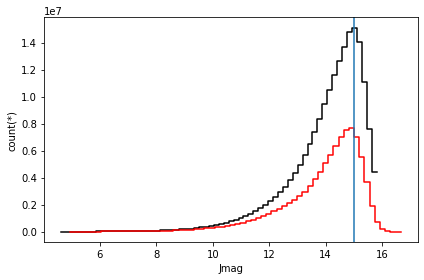

In [11]:
# compare
tmass.viz.histogram("Jmag", c='k')
gaia.viz.histogram("Jmag", c='r')
plt.axvline(15)

In [13]:
gaia_mask = gaia.filter(gaia["Jmag"] < 15)
gaia_mask = gaia_mask.extract()
tmass_mask = tmass.filter(tmass["Jmag"] < 15)
tmass_mask = tmass_mask.extract()

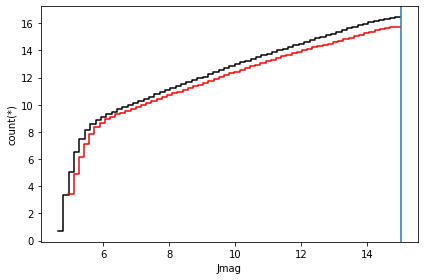

In [15]:
# compare
tmass_mask.viz.histogram("Jmag", c='k', f="log")
gaia_mask.viz.histogram("Jmag", c='r', f="log")
plt.axvline(15)

In [32]:
# partition in J and J-K
eJ = np.linspace(4, 15, 51)
eJK = np.linspace(-1, 2, 31)
J = (eJ[:-1]+eJ[1:])/2
JK = (eJK[:-1]+eJK[1:])/2

In [33]:
gaiaH, _, _ = np.histogram2d(gaia_mask["J-K"].to_numpy(), gaia_mask["Jmag"].to_numpy(), bins=(eJK, eJ))
gaiaH = gaiaH.T
tmassH, _, _ = np.histogram2d(tmass_mask["J-K"].to_numpy(), tmass_mask["Jmag"].to_numpy(), bins=(eJK, eJ))
tmassH = tmassH.T
comp = np.nan_to_num(gaiaH/tmassH)
more_than_one = comp > 1
comp[more_than_one] = 1
comp

<ipython-input-33-c1e73422b725>:5: RuntimeWarning: invalid value encountered in true_divide
  comp = np.nan_to_num(gaiaH/tmassH)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05434282, 0.05517144,
        0.05556735],
       [0.        , 0.        , 0.        , ..., 0.05334468, 0.05303835,
        0.05337704],
       [0.        , 0.        , 0.        , ..., 0.05109583, 0.05054284,
        0.05115379]])

Text(0, 0.5, 'J')

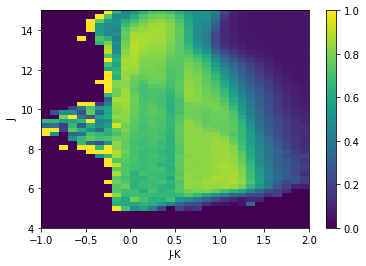

In [36]:
plt.imshow(comp, origin="lower", extent=[eJK[0], eJK[-1], eJ[0], eJ[-1]], aspect="auto")
plt.colorbar()
plt.xlabel("J-K")
plt.ylabel("J")


In [35]:
comp.shape

(50, 30)

In [43]:
df = []
N = len(comp[:, 0])
for i, (jk, jk_low, jk_high) in enumerate(zip( JK, eJK[:-1], eJK[1:])):
  df_new = vaex.from_dict({
    "comp": comp[:, i], 
    "JK": jk*np.ones(N) ,
    "JK_low": jk_low*np.ones(N), 
    "JK_high": jk_high*np.ones(N), 
    "J": J, 
    "J_low": eJ[:-1], 
    "J_high": eJ[1:]
  })
  if len(df) == 0:
    df = df_new
  else:
    df = df.concat(df_new)
df

#,comp,JK,JK_low,JK_high,J,J_low,J_high
0,0.0,-0.95,-1.0,-0.9,4.109999999999999,4.0,4.22
1,0.0,-0.95,-1.0,-0.9,4.33,4.22,4.44
2,0.0,-0.95,-1.0,-0.9,4.550000000000001,4.44,4.66
3,0.0,-0.95,-1.0,-0.9,4.77,4.66,4.88
4,0.0,-0.95,-1.0,-0.9,4.99,4.88,5.1
...,...,...,...,...,...,...,...
"1,495",0.05531087616556061,1.9500000000000002,1.9000000000000004,2.0,14.01,13.9,14.12
"1,496",0.05500841005665722,1.9500000000000002,1.9000000000000004,2.0,14.23,14.12,14.34
"1,497",0.05556735329510866,1.9500000000000002,1.9000000000000004,2.0,14.45,14.34,14.56
"1,498",0.053377039326001,1.9500000000000002,1.9000000000000004,2.0,14.67,14.56,14.78


In [44]:
df.export(join(data_dir, "completeness-single.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.38s =  0.0m =  0.0h
 